# BA model and scale-free networks

<div style="display: flex; align-items: center;">
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/docs/m05-scalefree/lab05.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" style="vertical-align: -8px; margin-right: 10px;" />
        Open this notebook in Google Colab
    </a>
</div>


<div style="display: flex; align-items: center;">
    <a href="https://raw.githubusercontent.com/yy/netsci-course/master/docs/m05-scalefree/lab05.ipynb" download>
        <img src="http://yyahn.com/netsci-course/images/download_icon.png" style="vertical-align: -8px; margin-right: 10px;" />
        Download this notebook (File -> Save As)
    </a>
</div>

## Implement BA algorithm

For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n`, the number of nodes for the graph, and `m0` the initial number of nodes, as arguments and returns a networkx graph with a power-law degree distribution.

The first step is figuring out how to do "preferential attachment" based on the degree of existing nodes. In other words, a node with degree 10 should be 10 times more likely to get a new edge than a node with degree 1 and 5 times more likely than a node with degree 2. How can we do this? 

If we just sample from a list containing all nodes, the probability of choosing a node is same for all nodes. 

In [2]:
import random 

node_list = [0,1,2,3,4,5]
print(random.sample(node_list, 1))

[5]


Can we make a list where node 0 is 7 times more likely to be chosen than node 1?

A simple way to do this is to simply repeat the node 0 seven times in the list. Then, when we sample a node from the list, we are 7 times more likely to choose node 0 than node 1.

In [4]:
node_list = [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5]
[random.sample(node_list, 1) for i in range(10)]

[[0], [2], [0], [5], [0], [0], [0], [0], [0], [0]]

In other words, if we simply repeat each node $i$ in the list $k_i$ (degree of node $i$), then the probability of choosing node $i$ is proportional to $k_i$. As you can imagine, this is not the most efficient way to do this, but it's a start. 

A more space-efficient way is using `numpy`'s sampling method. If you run the following cell, the documentation for the [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function will appear. 

In [5]:
import numpy as np

np.random.choice?

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a unif

It accepts `p` parameter and you can specifies the probability of each item in the list! So instead of creating

In [ ]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

You can do the following. 

In [6]:
nodes = [1,2,3]
degrees = [6,3,2]
sum_degrees = sum(degrees)
node_probs = [degree*1.0/sum_degrees for node, degree in zip(nodes,degrees)] 
node_probs

[0.5454545454545454, 0.2727272727272727, 0.18181818181818182]

We can do more efficiently with numpy.

In [15]:
# using numpy to calculate the probabilities of each node more efficiently
node_probs = np.array(degrees) / np.sum(degrees)
node_probs

array([0.54545455, 0.27272727, 0.18181818])

Now, we can sample from the list with corresponding probability. 

In [21]:
[np.random.choice(nodes, p=node_probs) for i in range(10)]

[3, 1, 1, 2, 1, 1, 2, 1, 1, 1]

We can also sample multiple nodes at once (without replacement) from the list. 

In [22]:
np.random.choice(nodes, 2, replace=False, p=node_probs)

array([2, 3])

Ok, now the sampling can be done. How about the initial graph with `m0` nodes? `networkx` has a convenient function for that: https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html 

**Q: Can you create a complete graph with 5 nodes and then check the edges to make sure you have the right graph?**

In [23]:
# YOUR SOLUTION HERE

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

Now you're ready to implement the BA algorithm! Create a fully-connected network with `m0` nodes. Then in each step, sample `m` nodes from the existing node pool. Add a new node and connect it to the chosen `m` nodes. 

**Q: Can you implement the BA algorithm?**

In [26]:
def barabasi_albert_graph(n, m0=5, m=2):
    """Create a BA network with n nodes, where each new node connects to 
    m existing nodes according to the preferential attachment rule. The initial
    network is a clique (fully-connected network) with m0 nodes. 
    """
    # Initial network of m_o nodes (a complete graph)
    # YOUR SOLUTION HERE

    # Prepare a degree list and node probability list. Use numpy arrays for more efficient calculations.
    # YOUR SOLUTION HERE

    # Until network has n nodes, 
    # 1. *preferentially* sample m nodes from the network,
    # 2. create a new node, 
    # 3. and connect the new node to the m selected nodes. 

    # YOUR SOLUTION HERE

    return G        

## BA graph analysis

**Q: Test your algorithm by creating a graph with $n = 1200$, $m_0 = 7$, and $m=2$. Calculate (and print) the average shortest path length of the graph:**

In [29]:
# YOUR SOLUTION HERE

3.9999513483458435

**Q: Calculate (and print) the average clustering coefficient of the graph.**

In [31]:
# YOUR SOLUTION HERE

0.03201703547323779

The [cumulative distribution function (CDF) and complementary cumulative distribution function (CCDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) are among the most direct ways to identify a power-law-like distribution. Plot the **CCDF** of the graph's degree distribution. 

First, **CDF** for a discrete distribution is defined as the following:

$$ F_X(x) = P(X \le x) = \sum_{x' \le x} P(x') $$

CCDF is it's reverse and is defined as following:

$$\bar F_X(x) = P(X > x) = \sum_{x' > x} P(x') = 1 - F_X(x).$$

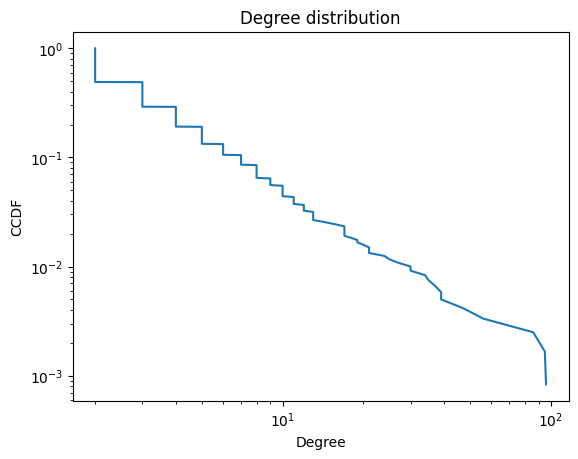

In [61]:
import matplotlib.pyplot as plt

def CCDF(degrees):
    # YOUR SOLUTION HERE
    pass


# YOUR SOLUTION HERE


## BA and ER comparison

Now let's compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

In [62]:
G_BA = barabasi_albert_graph(1000, m0=7, m=7)
print("number of nodes:", G_BA.number_of_nodes())
print("number of edges:", G_BA.number_of_edges())

number of nodes: 1000
number of edges: 6972


In [63]:
# you can use nx.gnm_random_graph(n, m) to create a random graph with n nodes and m edges.

# YOUR SOLUTION HERE

number of nodes: 1000
number of edges: 6972


**Q: calculate the average path length in both graphs.**

In [64]:
# YOUR SOLUTION HERE


Average shortest path length of G_BA: 2.73567967967968
Average shortest path length of G_random: 2.8836036036036035


Now plot the CCDF (for BA and ER) of the degree distribution of the random graph:

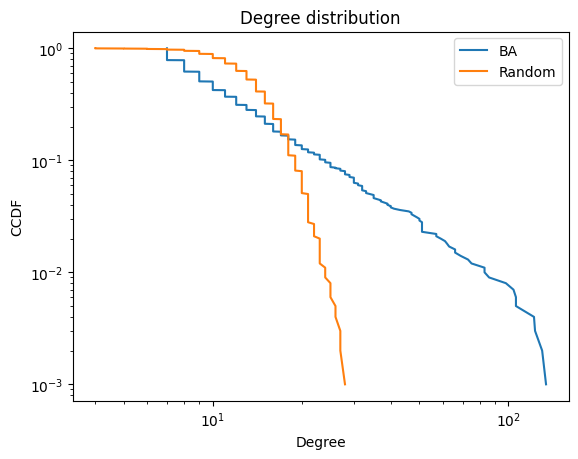

In [67]:
# YOUR SOLUTION HERE


## Preferential attachment without using the degree

As you know from the discussion and videos, it is possible to achieve the preferential attachment without calculating the degree by using the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

In [68]:
def barabasi_albert_graph_without_knowing_degrees(n, m0=5, m=2):
    """Create a BA network with n nodes, where each new node connects to 
    m existing nodes according to the preferential attachment rule. The initial
    network is a clique (fully-connected network) with m0 nodes. 

    This function does not use the degree list and node probability list.
    """
    # Create the initial network with m_o nodes (a complete graph)
    # YOUR SOLUTION HERE

    # now we add new nodes and grow the network by preferential attachment. 
    while(len(G.nodes()) < n):
        # how would you do the preferential attachment without knowing the degree of the nodes?
        new_node = len(G.nodes())
        # YOUR SOLUTION HERE
        
    return G            

**Q: build a network using this function and plot its CCDF to see if it has a power-law degree distribution.**

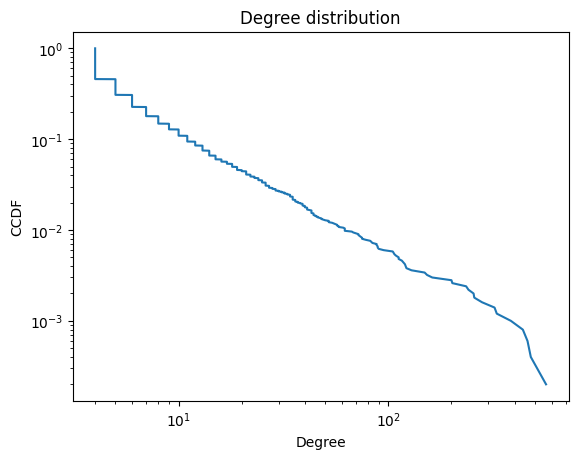

In [81]:
G = barabasi_albert_graph_without_knowing_degrees(5000, m0=7, m=4)

# YOUR SOLUTION HERE
